# Análise exploratória de dados

In [1]:
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


colors = ["#9467bd", "#057476", "#FF7A00"]
# sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

## 1. Coleta de Dados 

In [2]:
fmri = sns.load_dataset('fmri')
fmri.to_csv('../data/raw/fmriData.csv', index = False)
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


## 2. Descrição dos dados

**fMRI dataset** é um conjunto de dados com informações de exames de Imagem por Ressonância Magnética.

## 2.1 Dicionário de dados

In [3]:
fmri_dict = pd.DataFrame([
    {
        'variavel': 'subject',
        'descricao': 'A pessoa em que foi realizado o exame',
        'tipo': 'qualitativa',
        'subtipo': 'nominal', 
    },{
        'variavel': 'timepoint',
        'descricao': 'Período no tempo em que foi feito o exame',
        'tipo': 'qualitativa',
        'subtipo': 'ordinal',
    },{
        'variavel': 'event',
        'descricao': 'Forma como o cérebro foi estimulado para coleta de dados',
        'tipo': 'qualitativa',
        'subtipo': 'nominal',
      },{
        'variavel': 'region',
        'descricao': 'Região do cérebro examinada',
        'tipo': 'qualitativa',
        'subtipo': 'nominal',
    },{
        'variavel': 'signal',
        'descricao': 'Representa a atividade cerebral na região determinada',
        'tipo': 'quantitativa',
        'subtipo': 'contínua',
    }
])

In [4]:
fmri_dict.to_csv('../data/external/fmri_dict.csv', index=False)
fmri_dict

,variavel,descricao,tipo,subtipo
0,subject,A pessoa em que foi realizado o exame,qualitativa,nominal
1,timepoint,Período no tempo em que foi feito o exame,qualitativa,ordinal
2,event,Forma como o cérebro foi estimulado para colet...,qualitativa,nominal
3,region,Região do cérebro examinada,qualitativa,nominal
4,signal,Representa a atividade cerebral na região dete...,quantitativa,contínua


---
-  São 5 variáveis, sendo 4 delas qualitativas e uma quantitativa.
---

## 3. Perguntas de partida e hipóteses
-  Existem dados faltantes, se sim quantos e em quais variáveis?
-  Qual a distribuição dos dados (variável por variável)?
-  Existe relação entre o período no tempo e amplitude do sinal com a região do cérebro e tipo de estímulo?
-  Existe relação entre o período no tempo, amplitude do sinal e a região cerebral?
-  Existem correlações entre a amplitude do sinal e período no tempo, levando em conta cada estímulo e região?

## Existem dados faltantes, se sim, quantos e em quais variáveis?

In [5]:
number_of_na_by_column = fmri.isnull().sum().loc[lambda x: x > 0]
number_of_na_rows = fmri.isnull().any(axis=1).sum()



display(number_of_na_by_column)
display(Markdown(
    "---\n"
    f"A partir dessa informação sabemos que as variáveis temos {number_of_na_rows} linhas com valores faltantes."
    "\n\n ---"
))

#fmri.dropna(inplace=True)


Series([], dtype: int64)

---
A partir dessa informação sabemos que as variáveis temos 0 linhas com valores faltantes.

 ---

## Qual a distribuição dos dados (variável por variável)?
Iniciaremos com as estatísticas descritivas e posteriormente com visualizações das distribuições.

In [6]:
fmri.describe(include = "all")

,subject,timepoint,event,region,signal
count,1064,1064.000000,1064,1064,1064.000000
unique,14,NaN,2,2,NaN
top,s13,NaN,stim,parietal,NaN
freq,76,NaN,532,532,NaN
mean,NaN,9.000000,NaN,NaN,0.003540
std,NaN,5.479801,NaN,NaN,0.093930
min,NaN,0.000000,NaN,NaN,-0.255486
25%,NaN,4.000000,NaN,NaN,-0.046070
50%,NaN,9.000000,NaN,NaN,-0.013653
75%,NaN,14.000000,NaN,NaN,0.024293


---
-  Foram feitos exames com 14 pessoas.
-  Foram feitos exames por 19 vezes, descritos pelos Timepoints de 0 à 18.
-  Foram usados apenas dois tipos de estímulo para o exame.
-  Foram examinadas apenas duas regiões do cérebro.
-  A amplitude do sinal variou de -0.255486 à 0.564985.
---

#### Distribuição das variáveis qualitatitvas

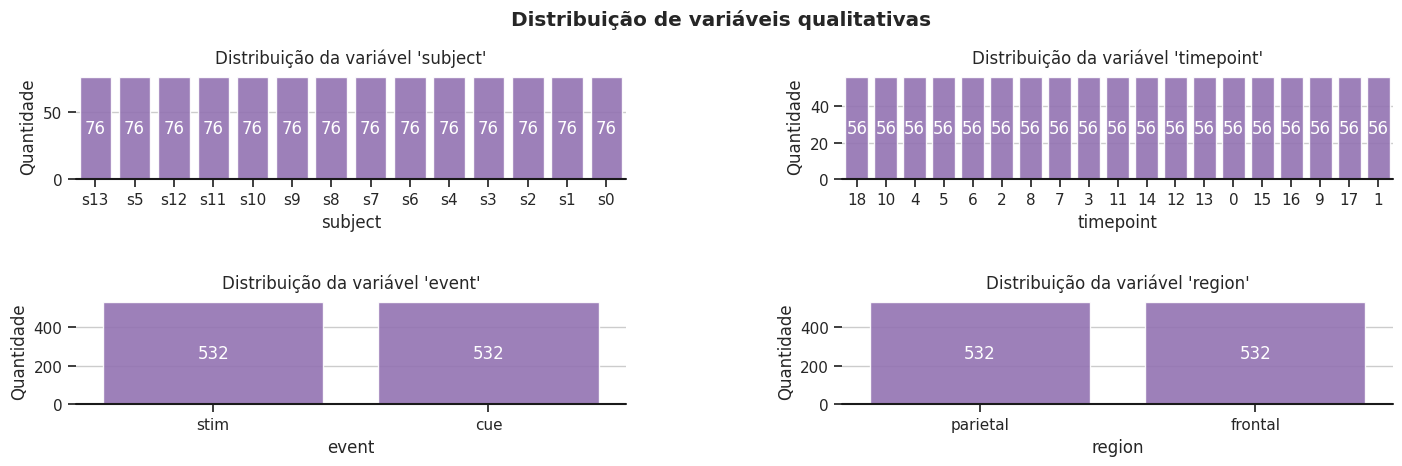

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(15,5))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis qualitativas', fontweight='bold')
for i, variavel in enumerate(fmri_dict.query("tipo == 'qualitativa'").variavel.to_list()):
    order = fmri[variavel].value_counts().index
    ax = sns.countplot(
        data=fmri,
        x=variavel,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9,
        order=order
    )
    ax.bar_label(
        ax.containers[0],
        fmt='%.0f',
        label_type='center',
        color='white'
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
plt.show()

---
-  Foram realizados o mesmo número de exames em cada pessoa.
-  Em cada timepoint foi realizado o mesmo número de exames.
-  Foi feita a mesma quantidade de exames usando cada estímulo.
-  Foi feita a mesma quantidade de exames para cada região do cérebro examinada.
---

#### Distribuição da variável quantitativa

0


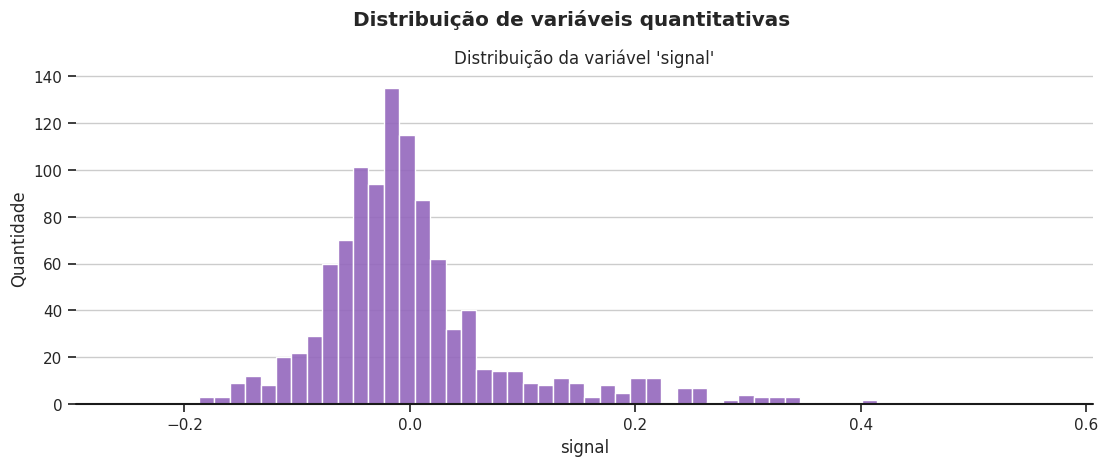

In [8]:
fig, axes = plt.subplots(1, 1, figsize=(12,5))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis quantitativas', fontweight='bold')
for i, variavel in enumerate(fmri_dict.query("tipo == 'quantitativa'").variavel.to_list()):
    ax = sns.histplot(
        data=fmri,
        x=variavel,
        color=colors[0],
        alpha=0.9,
    )
    print(i)

    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    plt.xlabel(variavel)
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
    # Customize grid to show only vertical lines
plt.show()

---
A partir da visualização acima podemos dizer que:
-  A maior parte dos sinais encontram-se com amplitude próximo e menor que 0.
-  Houve outliers com amplitude maior que 0.4.
---

#### Existe alguma relação entre o período no tempo e amplitude do sinal com a região do cérebro e tipo de estímulo?

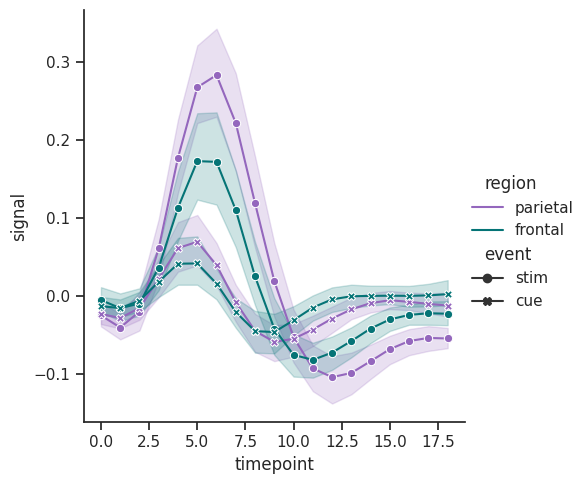

In [26]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri);

---
-  Os sinais usando o estímulo stim foram muito maiores do que o cue no intervalo de período entre 2.5 e 10, para ambas regiões do cérebro.
-  No início dos testes, a amplitude dos sinais foi mais próxima para todos os estímulos e regiões.
-  No intervalo de 2.5 à aproximadamente 8, o sinal na região pariental foi mais alto, após esse intervalo, a amplitude na região frontal foi mais alta.
---

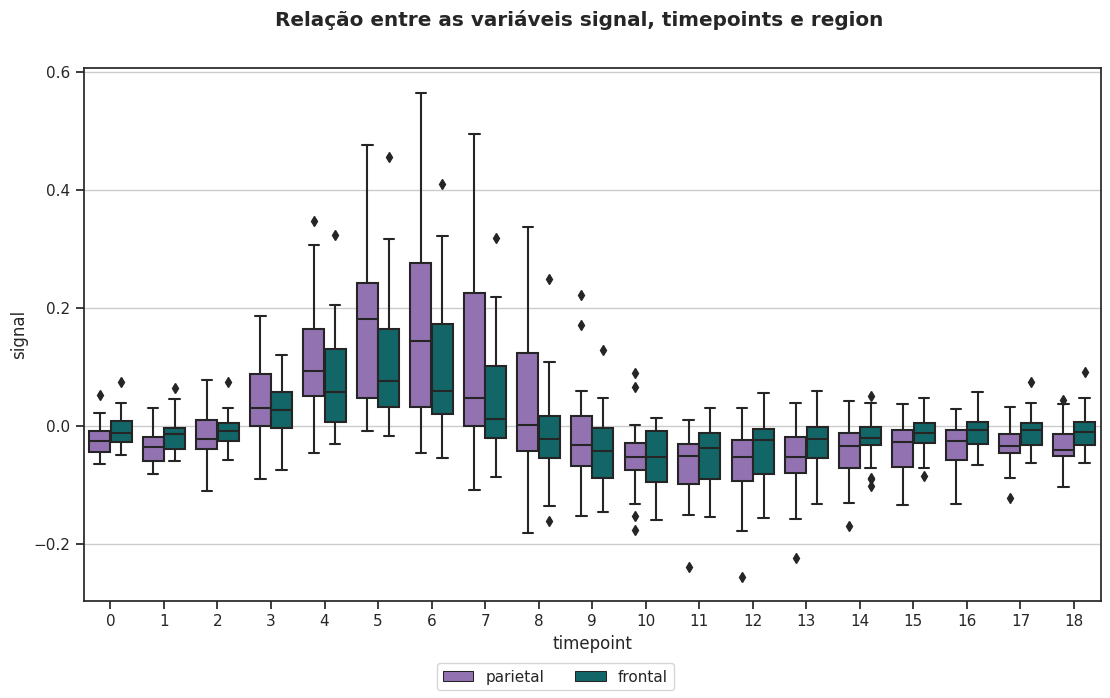

In [10]:
fig, axes = plt.subplots(1, 1, figsize=(12,7))
plt.tight_layout(pad=4, w_pad=4, h_pad=4)
fig.suptitle('Relação entre as variáveis signal, timepoints e region', fontweight='bold')
for i, variavel in enumerate(fmri_dict.query("tipo == 'quantitativa'").variavel.to_list()):
    ax = sns.boxplot(
        x="timepoint", 
        y="signal", 
        hue="region", 
        data=fmri, 
        
    )
    ax.grid(axis='y', linestyle='-')
    handles, labels = plt.gca().get_legend_handles_labels()
    ax.grid(axis='y', linestyle='-')
    ax.legend([],[], frameon=False)
# sns.despine(offset=2, trim=True)
fig.legend(handles, labels, loc='lower center', ncol=3)
plt.show()

---
-  No intervalo dos períodos de 3 à 8, a amplitude do sinal foi maior em relação aos outros timepoints.
-  No intervalo dos períodos de 3 à 8, a amplitude do sinal da região pariental foi maior do que a frontal.
-  Apesar da amplitude do sinal ser menor em ambos os casos, fora do período de 3 à 8, de 0 à 2 e de 9 à 18, o sinal da região frontal foi superior ao do pariental.
---

#### Existem correlações entre a amplitude do sinal e período no tempo, levando em conta cada estímulo e região?

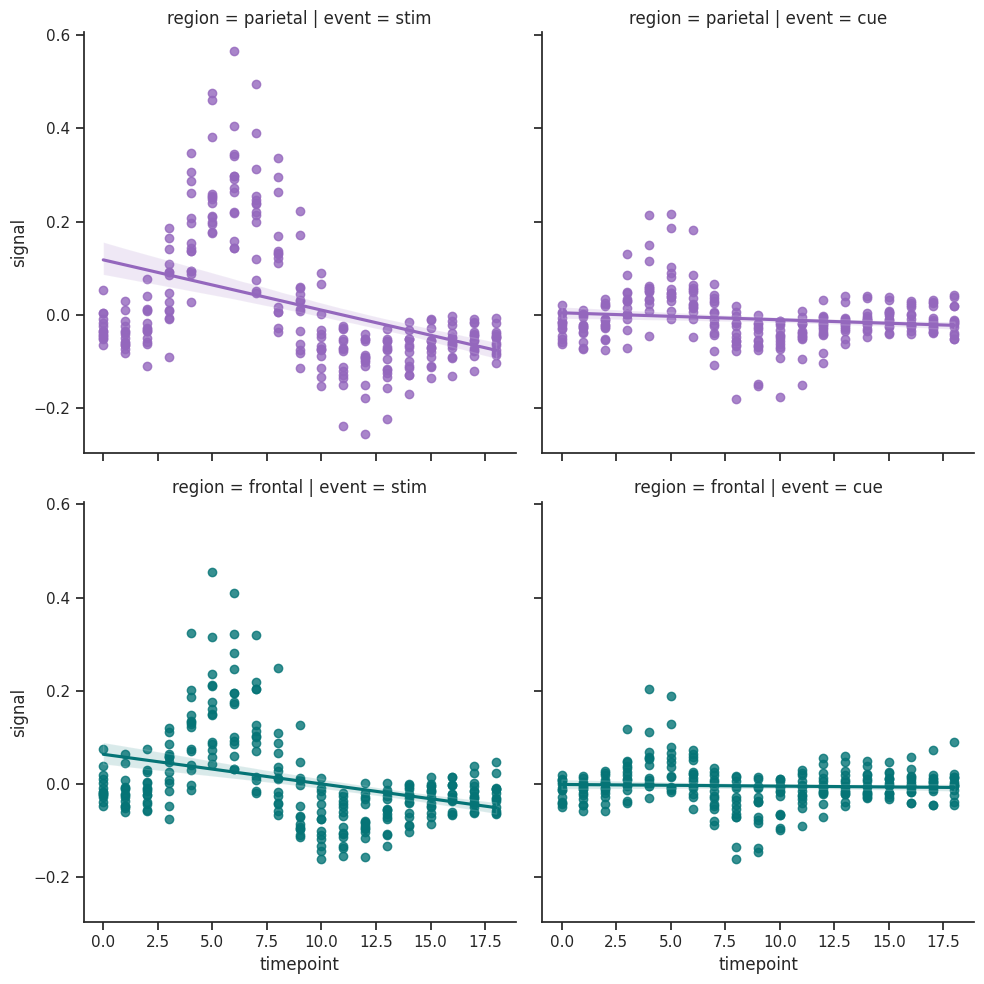

In [11]:
sns.lmplot(x = "timepoint", y = "signal", hue = "region", col = "event", row = "region", data = fmri)


---
-  Existem correlações negativas entre o signal e timepoint tanto nas regiões parientais e frontais para o event stim.
-  A correlação é nula entre o sinal e timepoint para o event cue na região frontal e levemente negativa na região pariental.
---

## 4. Insights

Com a ajuda das visualizações criadas, bem como da análise em relação ao dicionário de dados, as informações mais relevantes que conseguimos adquirir são:

-  O event stim gerou amplitudes de sinal mais altas do que o event cue, principalmente no intervalo de tempo entre 2.5 e 7.5.
-  Analisando o estímulo stim, foi visto que a região pariental produziu sinais numa faixa de amplitude maior do que a região frontal.
-  O sinal no estímulo cue possui uma faixa de amplitude ligeiramente menor do que o stim, para ambas regiões cerebrais.
-  Picos de amplitude positiva de sinal foram observados apenas no intervalo entre os timepoints 2.5 e 7.5.
-  Picos de amplitude negativa de sinal foram observado apenas após o timepoint 7.5.


## 5. Observações

Não são tiradas conclusões a respeito dos dados e/ou visualizações. Para tal, seria necessário o auxilio de algum especialista no assunto.